# Playwright driving a Web Browser
Playwright is a browser that gets spun up. This is good as it can **render html pages** for you instead of getting raw html. This differs from tools that just pull raw HTML/JS/Css down. 

You can do things like    
* take screenshots and send these to LLMs for processing. 
* render javascript on page in the "onload event" that builds up the UI components


In [2]:
#%pip install playwright
# run this in terminal: playwright install

# Screenshot of TradingView 

Browse to TradingView and take a screenshot see "./saved_images" folder.

1. Play with viewport sizes to see different resolutions
1. This examples showcases extensive JavaScript being run to render the screenshot below

Page title: Advanced Chart: Widget Code & Settings — TradingView


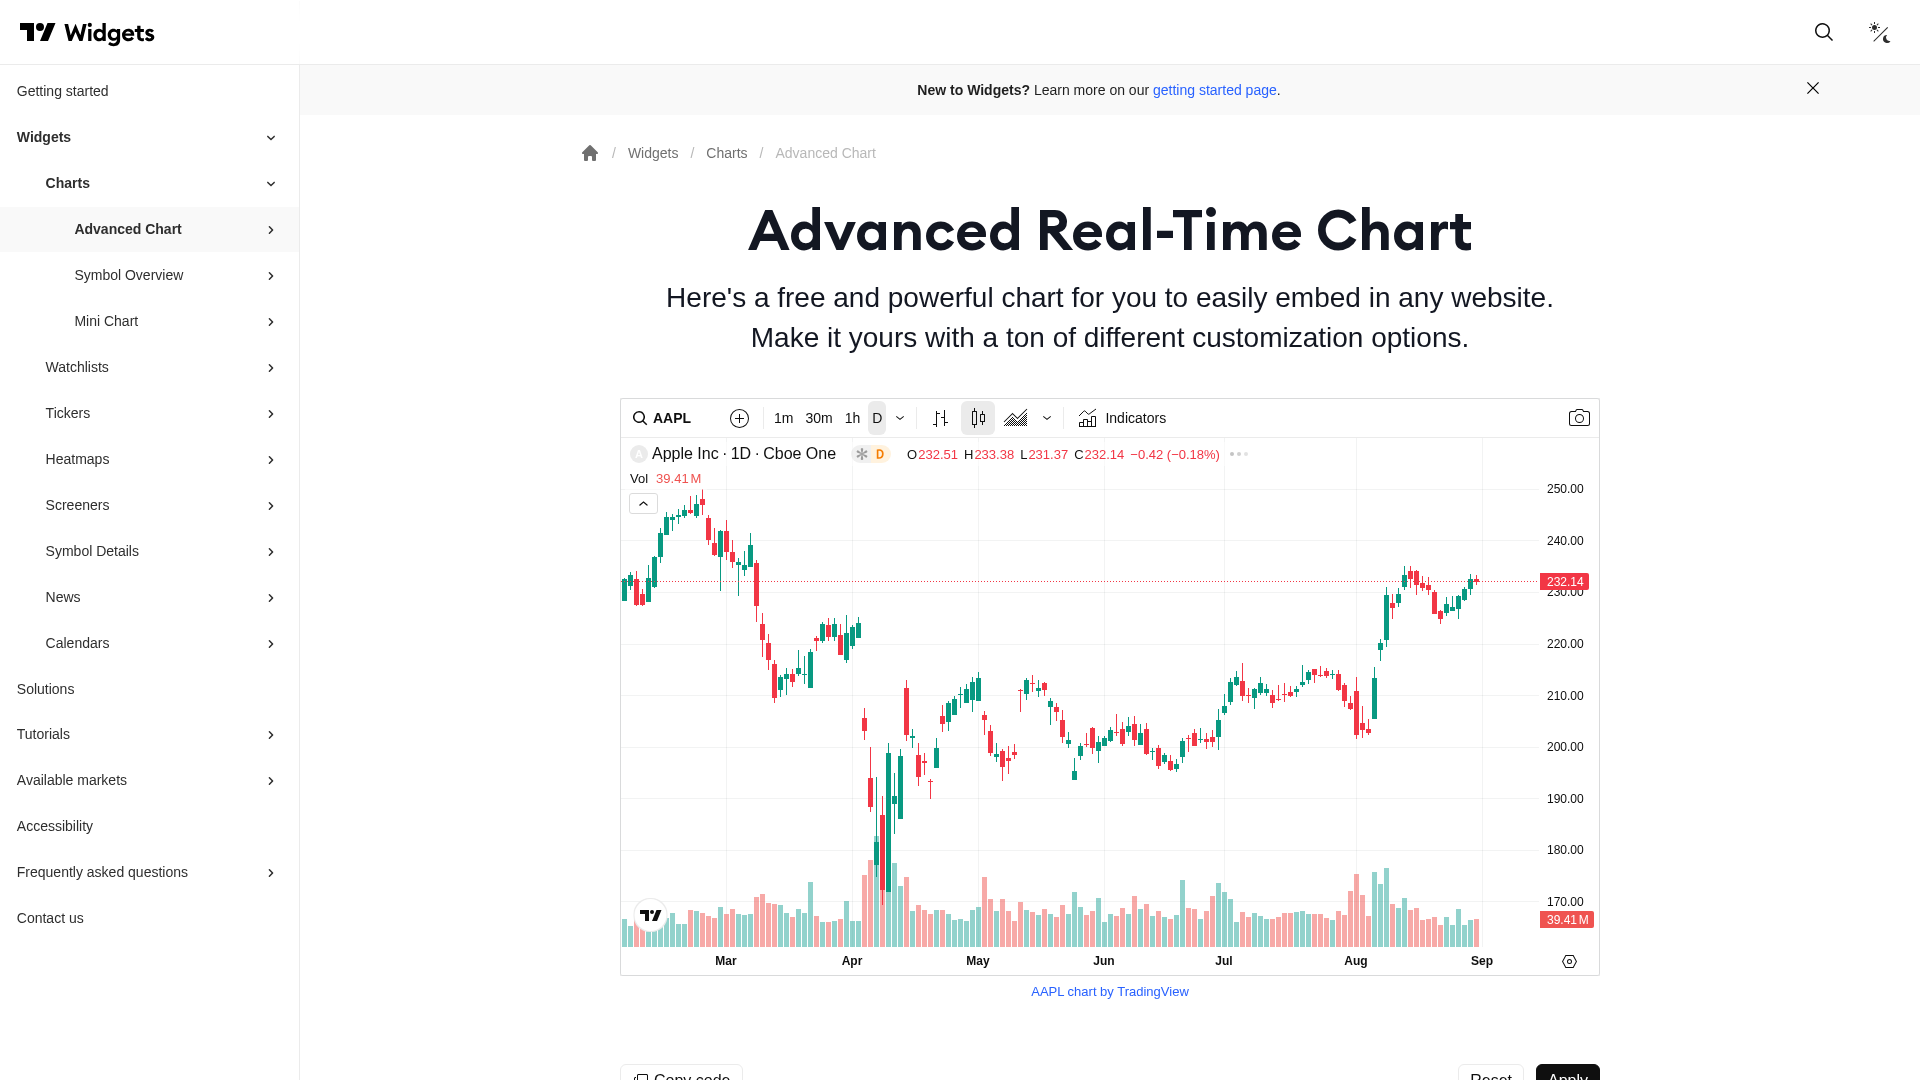

In [ ]:
import asyncio
from playwright.async_api import async_playwright
from IPython.display import Image, display

saved_file = "./saved_images/playwright_1_simple_browse_trading_view_1.png"

async def run_me():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page(viewport={"width": 1920, "height": 1080}) # Full HD
        #page = await browser.new_page(viewport={"width": 2560, "height": 1440})  # QHD
        #page = await browser.new_page(viewport={"width": 3840, "height": 2160}) # 4K
        #await page.goto("https://www.example.com")
        await page.goto("https://www.tradingview.com/widget-docs/widgets/charts/advanced-chart/")
        print(f"Page title: {await page.title()}")
        await page.screenshot(path=saved_file)
        await browser.close()

await run_me()

# Display the image
display(Image(filename=saved_file))


# Screenshot of Google Landing Page

Page title: Google


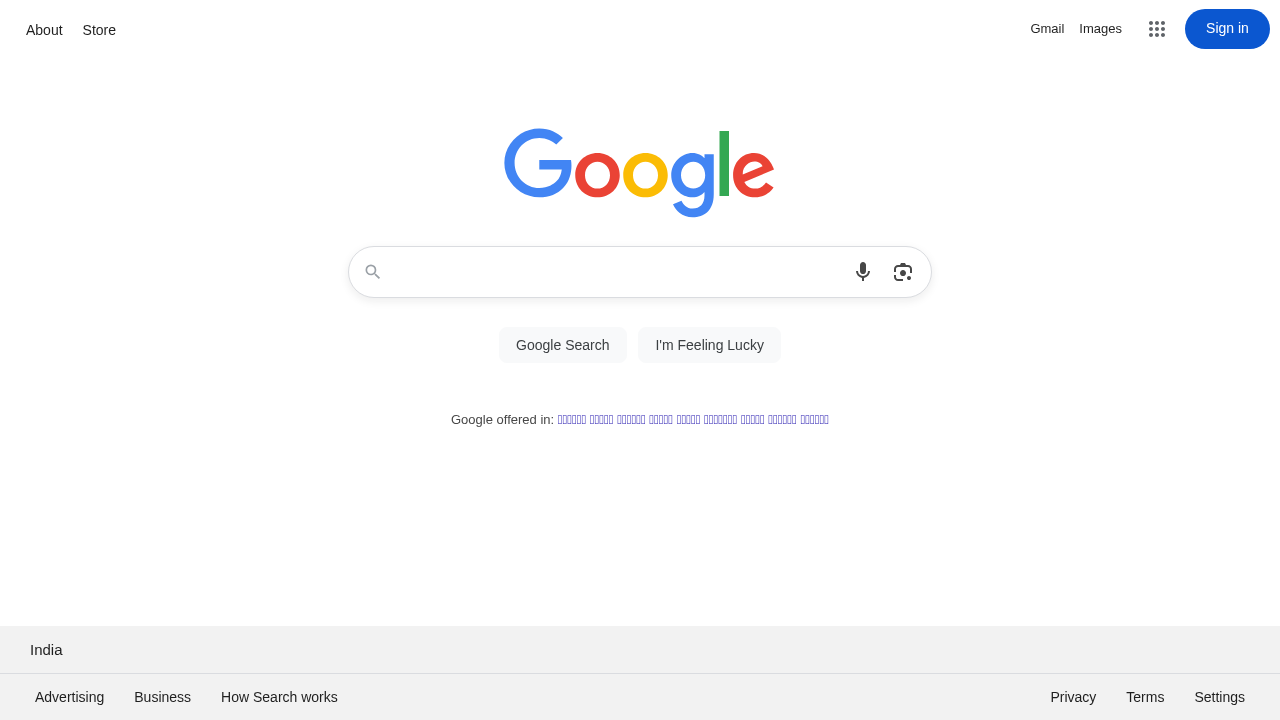

In [ ]:
import asyncio
from playwright.async_api import async_playwright

saved_file = "./saved_images/playwright_1_simple_browse_google.png"

async def run_me():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        await page.goto("https://www.google.com")
        print(f"Page title: {await page.title()}")
        await page.screenshot(path=saved_file)
        await browser.close()

await run_me()

# Display the image
display(Image(filename=saved_file))

# Full Page Screenshot

Page title: About Us | Leadership | Sanlam


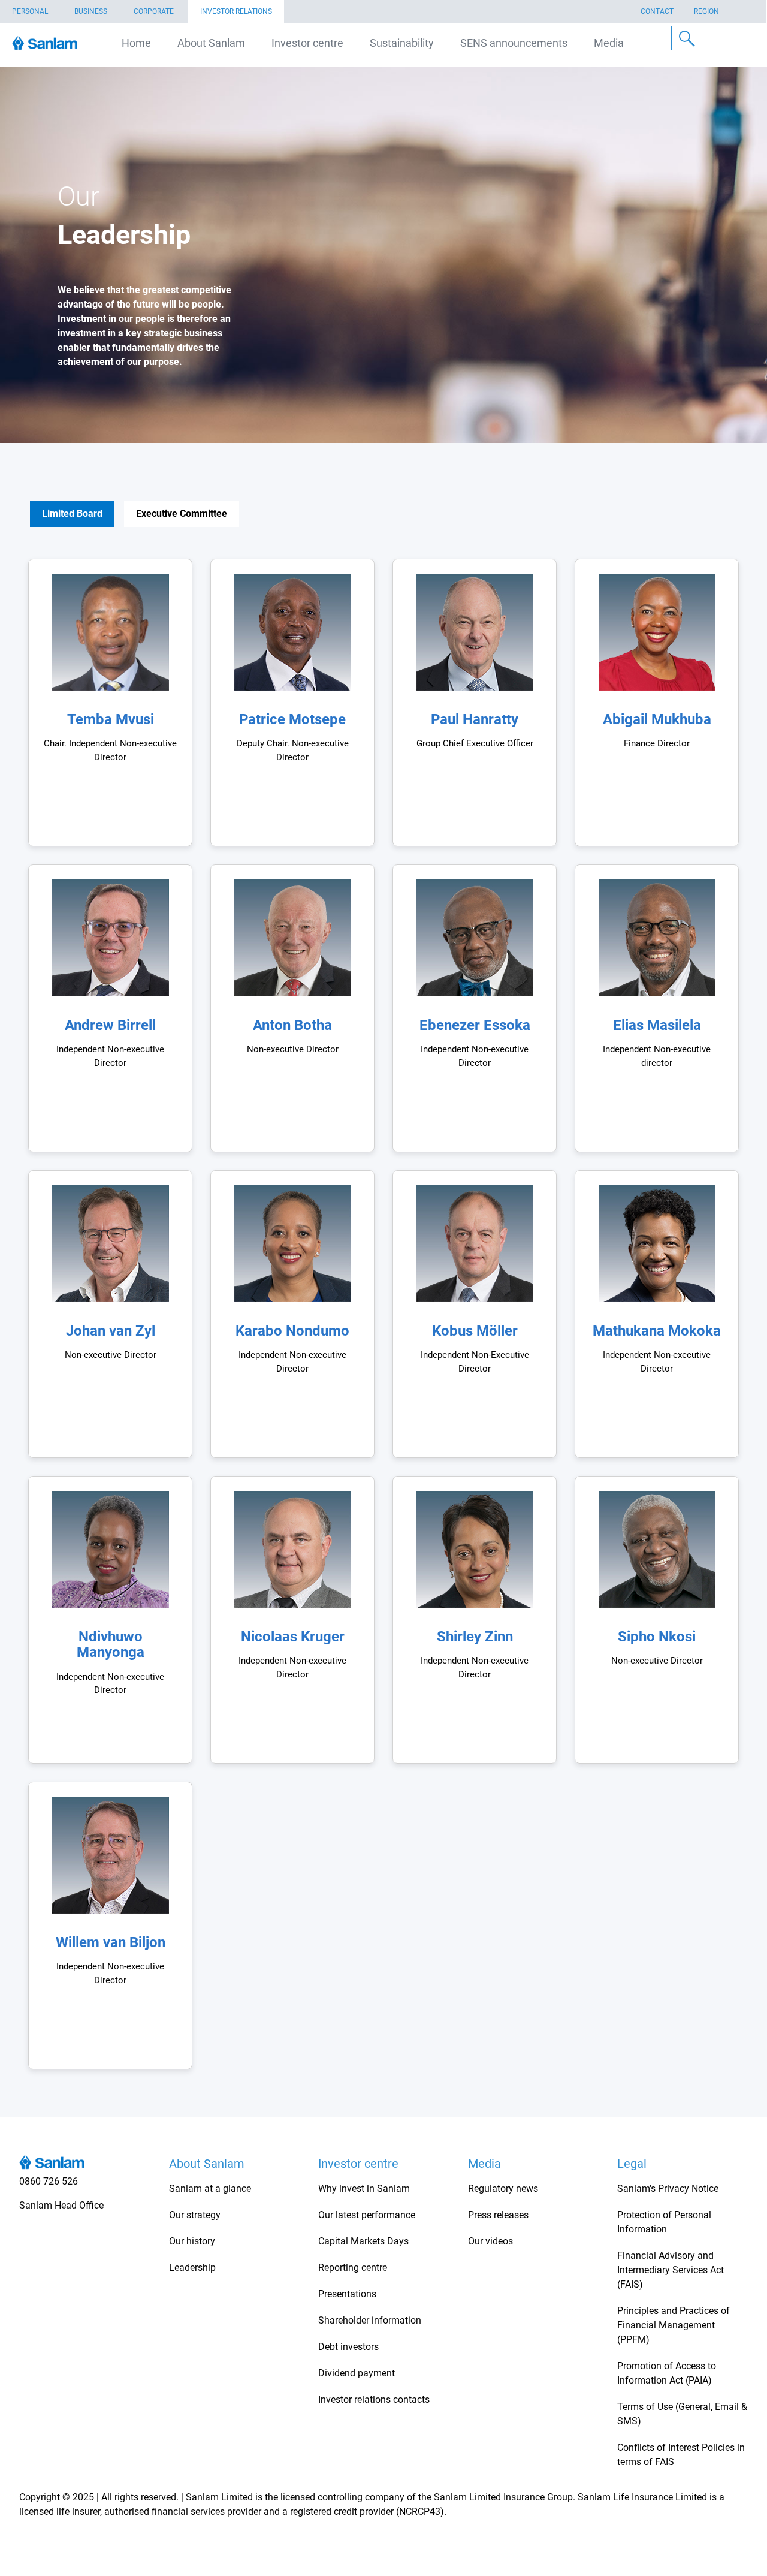

In [17]:
saved_file = "./saved_images/playwright_1_simple_browse_sanlam_board_structure.png"

async def run_me():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        await page.goto("https://www.sanlam.com/leadership")
        print(f"Page title: {await page.title()}")
        await page.screenshot(path=saved_file, full_page=True)
        await browser.close()

await run_me()

# Display the image
display(Image(filename=saved_file))